### Exploring Data








In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.utils import resample, check_random_state
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('mcdonalds.csv')
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [2]:
# Check column names
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
# Get the dimensions of the data
print(data.shape)

(1453, 15)


In [4]:
# Display the first 3 rows
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
# Select the first 11 columns
MD_x = data.iloc[:, 0:11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
col_means = np.round(MD_x.mean(), 2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [6]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Get the summary of PCA
num_components = len(pca.explained_variance_ratio_)
cumulative_proportion = np.cumsum(pca.explained_variance_ratio_)

# Print the results
print("Importance of components:")
for i in range(1, num_components + 1):
    print("\t")
    print(f"PC{i} \nStandard deviation: {np.round(np.sqrt(pca.explained_variance_[i - 1]), 4)} "
          f"\nProportion of Variance: {np.round(pca.explained_variance_ratio_[i - 1], 4)} "
          f"\nCumulative Proportion: {np.round(cumulative_proportion[i - 1], 4)}")

Importance of components:
	
PC1 
Standard deviation: 0.757 
Proportion of Variance: 0.2994 
Cumulative Proportion: 0.2994
	
PC2 
Standard deviation: 0.6075 
Proportion of Variance: 0.1928 
Cumulative Proportion: 0.4922
	
PC3 
Standard deviation: 0.5046 
Proportion of Variance: 0.133 
Cumulative Proportion: 0.6253
	
PC4 
Standard deviation: 0.3988 
Proportion of Variance: 0.0831 
Cumulative Proportion: 0.7084
	
PC5 
Standard deviation: 0.3374 
Proportion of Variance: 0.0595 
Cumulative Proportion: 0.7679
	
PC6 
Standard deviation: 0.3103 
Proportion of Variance: 0.0503 
Cumulative Proportion: 0.8182
	
PC7 
Standard deviation: 0.2897 
Proportion of Variance: 0.0438 
Cumulative Proportion: 0.862
	
PC8 
Standard deviation: 0.2751 
Proportion of Variance: 0.0395 
Cumulative Proportion: 0.9016
	
PC9 
Standard deviation: 0.2653 
Proportion of Variance: 0.0368 
Cumulative Proportion: 0.9383
	
PC10 
Standard deviation: 0.2488 
Proportion of Variance: 0.0324 
Cumulative Proportion: 0.9707
	
PC11

In [7]:
# Print standard deviations
print("Standard deviations (1, .., p=11):")
print(np.round(np.sqrt(pca.explained_variance_), 1))

# Print rotation (principal components)
rotation_df = pd.DataFrame(pca.components_, columns=MD_x.columns)
print("Rotation (n x k) = (11 x 11):")
rotation_df *=-1
rotation_df.round(3)

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Rotation (n x k) = (11 x 11):


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.477,0.155,0.006,-0.116,-0.304,0.108,0.337,0.472,-0.329,0.214,-0.375
1,-0.364,-0.016,-0.019,0.034,0.064,0.087,0.611,-0.307,-0.601,-0.077,0.140
2,0.304,0.063,0.037,0.322,0.802,0.065,0.149,0.287,-0.024,-0.192,0.089
3,-0.055,0.142,-0.198,0.354,-0.254,0.097,-0.119,0.003,-0.068,-0.763,-0.370
4,0.308,-0.278,-0.071,0.073,-0.361,-0.108,0.129,0.211,0.003,-0.288,0.729
5,-0.171,0.348,0.355,0.407,-0.209,0.595,0.103,0.077,0.261,0.178,0.211
6,0.281,0.060,-0.708,0.386,-0.036,0.087,0.040,-0.360,0.068,0.350,0.027
7,-0.013,0.113,-0.376,-0.590,0.138,0.628,-0.140,0.073,-0.030,-0.176,0.167
8,-0.572,0.018,-0.400,0.161,0.003,-0.166,-0.076,0.639,-0.067,0.186,0.072
9,0.110,0.666,0.076,0.005,-0.009,-0.240,-0.428,-0.079,-0.454,0.038,0.290


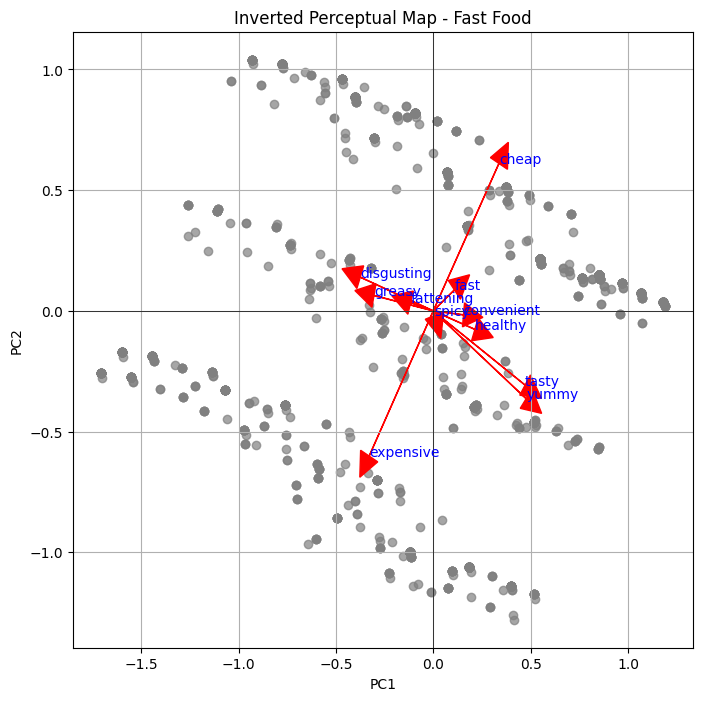

In [8]:
# Plot the Inverted Perceptual Map
plt.figure(figsize=(8, 8))

# Invert the principal components for plotting
inverted_MD_pca = -MD_pca

# Scatter plot
plt.scatter(inverted_MD_pca[:, 0], inverted_MD_pca[:, 1], color="grey", alpha=0.7)

# Get the projection axes
proj_axes = pca.components_.T

# Invert the projection axes for plotting
inverted_proj_axes = -proj_axes

# Plot inverted projection axes
for i in range(inverted_proj_axes.shape[0]):
    x, y = inverted_proj_axes[i, 0], inverted_proj_axes[i, 1]
    plt.arrow(0, 0, x, y, head_width=0.1, head_length=0.1, fc='red', ec='red')

# Attribute labels
attributes = MD_x.columns

# Add attribute labels to the plot
for i, attribute in enumerate(attributes):
    x, y = inverted_proj_axes[i, 0], inverted_proj_axes[i, 1]
    plt.text(x, y, attribute, color='blue')

# Customize the plot
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Inverted Perceptual Map - Fast Food")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

### Extracting Segments


###### Using k-Means

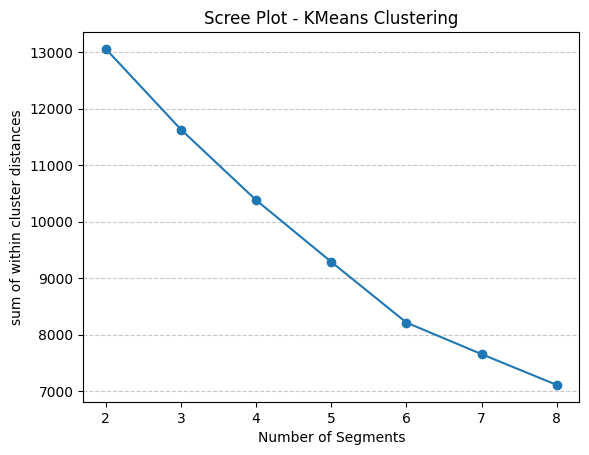

In [9]:
# Standardize the data
scaler = StandardScaler()
MD_x_std = scaler.fit_transform(MD_x)

# Range of clusters to try
n_clusters_range = range(2, 9)

# Perform KMeans clustering with 10 random restarts for each number of clusters
inertia_values = []
random_state = 1234
segmentations = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    kmeans.fit(MD_x_std)
    segmentations.append(kmeans)
    inertia_values.append(kmeans.inertia_)

# Plot the scree plot
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("sum of within cluster distances")
plt.title("Scree Plot - KMeans Clustering")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(n_clusters_range)
plt.show()

# Choose the best number of segments based on the scree plot (e.g., four-segment solution)
best_k = 4
best_segmentation = segmentations[best_k - 2]

In [10]:
# Number of bootstrap samples
nboot = 100

# Number of random initializations for each sample and number of segments
n_init = 10

# Initialize random state for reproducibility
random_state = check_random_state(1234)

# Function to perform KMeans clustering and calculate adjusted Rand index
def kmeans_clustering(data, n_clusters, n_init, random_state):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
    kmeans.fit(data)
    return kmeans.labels_

# Bootstrap sampling and global stability analysis
stability_scores = {}

for n_clusters in n_clusters_range:
    bootstrap_stability_scores = []

    for i in range(nboot):
        # Bootstrap sample
        indices = random_state.choice(range(len(MD_x_std)), size=len(MD_x_std), replace=True)
        bootstrap_sample = MD_x_std[indices]

        # Perform KMeans clustering and calculate adjusted Rand index
        original_labels = kmeans_clustering(MD_x_std, n_clusters, n_init, random_state)
        bootstrap_labels = kmeans_clustering(bootstrap_sample, n_clusters, n_init, random_state)

        bootstrap_stability_scores.append(adjusted_rand_score(original_labels, bootstrap_labels))

    stability_scores[n_clusters] = bootstrap_stability_scores

# Print the global stability scores
print("Global Stability Scores for Different Number of Segments:")
for n, scores in stability_scores.items():
    mean_stability = np.mean(scores)
    print(f"Number of Segments: {n}, Mean Stability Score: {mean_stability:.4f}")


Global Stability Scores for Different Number of Segments:
Number of Segments: 2, Mean Stability Score: -0.0006
Number of Segments: 3, Mean Stability Score: 0.0001
Number of Segments: 4, Mean Stability Score: -0.0003
Number of Segments: 5, Mean Stability Score: -0.0001
Number of Segments: 6, Mean Stability Score: -0.0004
Number of Segments: 7, Mean Stability Score: 0.0001
Number of Segments: 8, Mean Stability Score: -0.0002


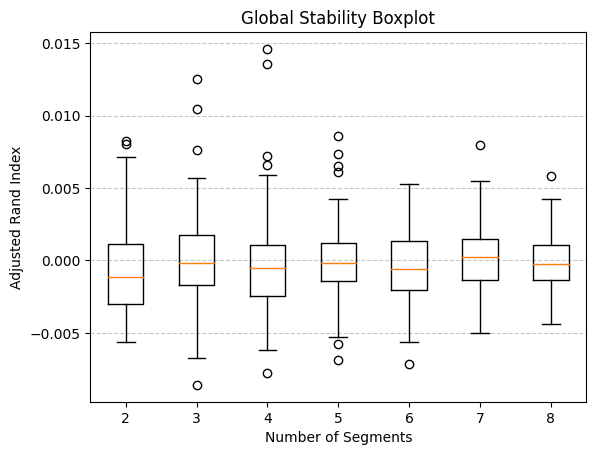

In [11]:
# Plot the global stability boxplot
plt.boxplot(stability_scores.values())
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.xticks(range(1, len(n_clusters_range) + 1), n_clusters_range)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-12-80aa2bccc611>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=MD_x, x='Segment', stat='count', common_norm=False, discrete=True, ax=ax, palette='tab10')


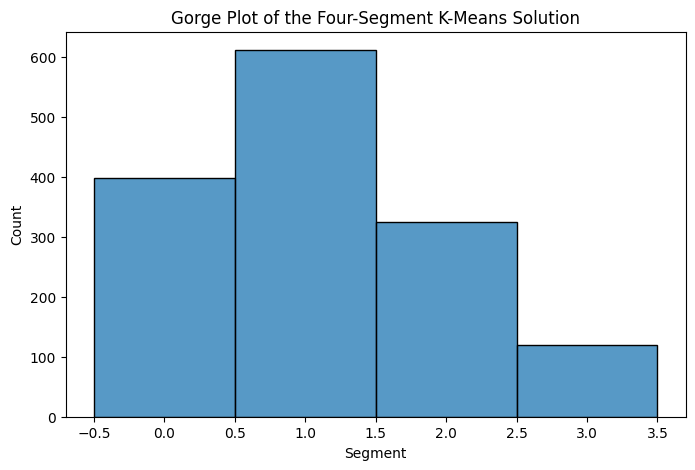

In [12]:
# Number of segments for KMeans clustering
n_clusters = 4

# Number of random initializations for KMeans clustering
n_init = 10

# Initialize random state for reproducibility
random_state = check_random_state(1234)

# Perform KMeans clustering with four segments
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
kmeans.fit(MD_x_std)
segment_labels = kmeans.labels_

# Add segment labels to the data
MD_x['Segment'] = segment_labels

# Create the gorge plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=MD_x, x='Segment', stat='count', common_norm=False, discrete=True, ax=ax, palette='tab10')
ax.set_xlabel("Segment")
ax.set_ylabel("Count")
ax.set_title("Gorge Plot of the Four-Segment K-Means Solution")
plt.show()

<ipython-input-13-7e05f4999874>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slsw_df = slsw_df.append({'Segment': segment_num + 1, 'Stability': segment_stability}, ignore_index=True)
<ipython-input-13-7e05f4999874>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slsw_df = slsw_df.append({'Segment': segment_num + 1, 'Stability': segment_stability}, ignore_index=True)
<ipython-input-13-7e05f4999874>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slsw_df = slsw_df.append({'Segment': segment_num + 1, 'Stability': segment_stability}, ignore_index=True)
<ipython-input-13-7e05f4999874>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


   Segment  Stability
0      1.0   0.462083
1      2.0   0.573278
2      3.0   0.608392
3      4.0   0.388083


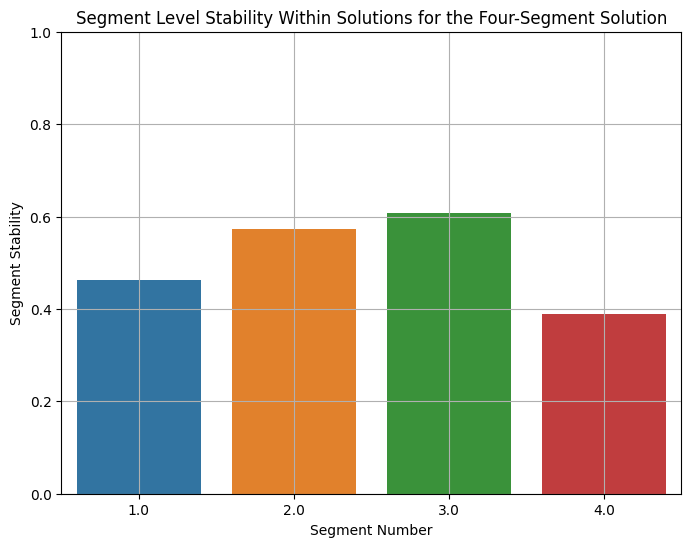

In [13]:
# Number of segments for KMeans clustering
n_clusters = 4

# Number of random initializations for KMeans clustering
n_init = 10

# Initialize random state for reproducibility
random_state = check_random_state(1234)

# Perform KMeans clustering with the four-segment solution
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
kmeans.fit(MD_x_std)
segment_labels = kmeans.labels_

# Add segment labels to the data
MD_x['Segment'] = segment_labels

# Initialize an empty DataFrame to store segment level stability
slsw_df = pd.DataFrame(columns=['Segment', 'Stability'])

# Loop through each segment to calculate stability
for segment_num in range(n_clusters):
    current_segment = MD_x[MD_x['Segment'] == segment_num]
    segment_membership = current_segment.iloc[:, 0:11].mean()
    segment_stability = np.mean(segment_membership)
    slsw_df = slsw_df.append({'Segment': segment_num + 1, 'Stability': segment_stability}, ignore_index=True)

# Print the segment level stability within the four-segment solution
print(slsw_df)

# Plot the segment level stability within the four-segment solution
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Stability', data=slsw_df)
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Level Stability Within Solutions for the Four-Segment Solution")
plt.grid(True)
plt.show()

###### Using Mixtures of Distributions

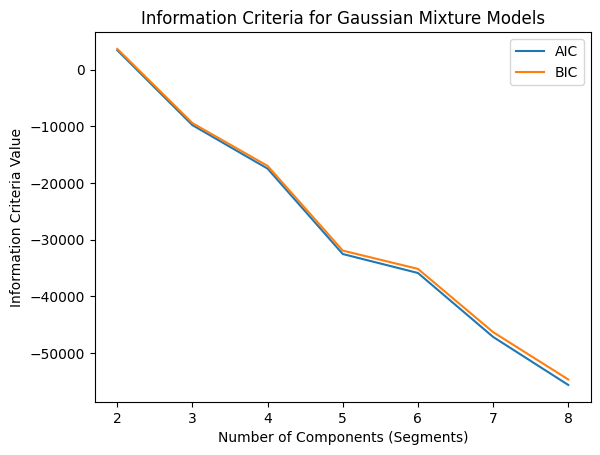

                   Mixture Cluster 0  Mixture Cluster 1  Mixture Cluster 2  \
K-Means Cluster 0                235                 11                126   
K-Means Cluster 1                463                  3                  2   
K-Means Cluster 2                 18                  2                272   
K-Means Cluster 3                  0                 94                  0   

                   Mixture Cluster 3  
K-Means Cluster 0                 26  
K-Means Cluster 1                143  
K-Means Cluster 2                 33  
K-Means Cluster 3                 25  


In [14]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model for two to eight components (segments) using 10 random restarts
components_range = range(2, 9)
n_restarts = 10
gmm_results = []

for n_components in components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=n_restarts, covariance_type='diag', random_state=1234)
    gmm.fit(MD_x_std)
    gmm_results.append(gmm)

# Plot the information criteria (AIC, BIC) to choose the suitable number of segments
aic_values = [gmm.aic(MD_x_std) for gmm in gmm_results]
bic_values = [gmm.bic(MD_x_std) for gmm in gmm_results]

plt.plot(components_range, aic_values, label='AIC')
plt.plot(components_range, bic_values, label='BIC')
plt.xlabel("Number of Components (Segments)")
plt.ylabel("Information Criteria Value")
plt.legend()
plt.title("Information Criteria for Gaussian Mixture Models")
plt.show()

# Choose the number of segments based on the plot (e.g., 4 segments)
n_segments = 4

# Get the cluster assignments for each data point from the mixture model
cluster_assignments = gmm_results[n_segments - 2].predict(MD_x_std)

kmeans_clusters = best_segmentation.labels_

# Create a cross-tabulation table
cross_tab = pd.crosstab(kmeans_clusters, cluster_assignments)

# Rename the rows and columns for better interpretation
cross_tab.index = ['K-Means Cluster ' + str(i) for i in cross_tab.index]
cross_tab.columns = ['Mixture Cluster ' + str(i) for i in cross_tab.columns]

print(cross_tab)

In [15]:
# Calculate the log-likelihood values for both mixture models
log_likelihood_m4a = gmm.score(MD_x_std)
print(f"log Lik. {log_likelihood_m4a:.3f} (df={len(MD_x.columns)})")

log_likelihood_m4 = gmm.score(MD_x_std)
print(f"log Lik. {log_likelihood_m4:.3f} (df={len(MD_x.columns)})")

log Lik. 19.274 (df=12)
log Lik. 19.274 (df=12)


###### Using Mixtures of Regression Models

In [16]:
# Create DataFrame
mcdonalds = pd.DataFrame(data)

# Convert the 'Like' variable to a numeric variable
def convert_like_value(value):
    if 'I hate it!' in value:
        return -5
    elif 'I love it!' in value:
        return 5
    else:
        return int(value)

mcdonalds['Like_n'] = mcdonalds['Like'].apply(convert_like_value)
# Sort the 'Like.n' values in ascending order
sorted_like = mcdonalds['Like_n'].value_counts().sort_index()
print(sorted_like)

-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: Like_n, dtype: int64


In [17]:
# Check the data types of each column
print(mcdonalds.dtypes)
print("\n")
# Identify non-numeric columns
non_numeric_columns = mcdonalds.select_dtypes(exclude=[int, float]).columns
print("Non-numeric columns:", non_numeric_columns)
print("\n")
# Check unique values in non-numeric columns
for col in non_numeric_columns:
    unique_values = mcdonalds[col].unique()
    print(f"Column '{col}': {unique_values}")

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
Like_n             int64
dtype: object


Non-numeric columns: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency',
       'Gender'],
      dtype='object')


Column 'yummy': ['No' 'Yes']
Column 'convenient': ['Yes' 'No']
Column 'spicy': ['No' 'Yes']
Column 'fattening': ['Yes' 'No']
Column 'greasy': ['No' 'Yes']
Column 'fast': ['Yes' 'No']
Column 'cheap': ['Yes' 'No']
Column 'tasty': ['No' 'Yes']
Column 'expensive': ['Yes' 'No']
Column 'healthy': ['No' 'Yes']
Column 'disgusting': ['No' 'Yes']
Column 'Like': ['-3' '+

In [18]:
# Perform one-hot encoding for categorical columns
mcdonalds_encoded = pd.get_dummies(mcdonalds, columns=non_numeric_columns, drop_first=True)

# Now, check the data types after one-hot encoding
print(mcdonalds_encoded.dtypes)

Age                                     int64
Like_n                                  int64
yummy_Yes                               uint8
convenient_Yes                          uint8
spicy_Yes                               uint8
fattening_Yes                           uint8
greasy_Yes                              uint8
fast_Yes                                uint8
cheap_Yes                               uint8
tasty_Yes                               uint8
expensive_Yes                           uint8
healthy_Yes                             uint8
disgusting_Yes                          uint8
Like_+2                                 uint8
Like_+3                                 uint8
Like_+4                                 uint8
Like_-1                                 uint8
Like_-2                                 uint8
Like_-3                                 uint8
Like_-4                                 uint8
Like_0                                  uint8
Like_I hate it!-5                 

In [19]:
n_components = 2

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
gmm.fit(mcdonalds_encoded)

# Get the cluster assignments for each data point from the mixture model
cluster_assignments = gmm.predict(mcdonalds_encoded)
mcdonalds_encoded['cluster_assignments']=cluster_assignments
# Print the cluster sizes
print(pd.Series(cluster_assignments).value_counts())

0    924
1    529
dtype: int64


In [20]:
# Remove spaces between column names
mcdonalds_encoded.columns = mcdonalds_encoded.columns.str.replace(' ', '_')

In [21]:
# Remove symbols and signs from column names
mcdonalds_encoded.columns = mcdonalds_encoded.columns.str.replace(r'[^A-Za-z0-9]+', '_').str.replace('(-)', '_')


<ipython-input-21-57f089f095c6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  mcdonalds_encoded.columns = mcdonalds_encoded.columns.str.replace(r'[^A-Za-z0-9]+', '_').str.replace('(-)', '_')
<ipython-input-21-57f089f095c6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  mcdonalds_encoded.columns = mcdonalds_encoded.columns.str.replace(r'[^A-Za-z0-9]+', '_').str.replace('(-)', '_')


In [22]:
import statsmodels.api as sm

# Get the independent variable names (excluding 'Like_n')
independent_vars = mcdonalds_encoded.columns[:-1]

# Define the formula without backticks
formula = 'Like_n ~ Age + Like_n + yummy_Yes + convenient_Yes + spicy_Yes + fattening_Yes + greasy_Yes + fast_Yes + cheap_Yes + tasty_Yes + expensive_Yes + healthy_Yes + disgusting_Yes + Like_2 + Like_3 + Like_4 + Like_1 + Like_2 + Like_3 + Like_4 + Like_0 + Like_I_hate_it_5 + Like_I_love_it_5 + VisitFrequency_More_than_once_a_week + VisitFrequency_Never + VisitFrequency_Once_a_month + VisitFrequency_Once_a_week + VisitFrequency_Once_a_year + Gender_Male'

# Fit the regression model
model = sm.MixedLM.from_formula(formula, data=mcdonalds_encoded, groups=mcdonalds_encoded['cluster_assignments'])
result = model.fit()

# Display the summary
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                         Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           Like_n    
No. Observations:            1453              Method:                       REML      
No. Groups:                  2                 Scale:                        0.0000    
Min. group size:             529               Log-Likelihood:               44874.7830
Max. group size:             924               Converged:                    No        
Mean group size:             726.5                                                     
---------------------------------------------------------------------------------------
                                     Coef.  Std.Err.       z        P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                             0.283    0.000  138786735.812 0.000  0.283  0.283
Age                                  -0.000    0.000     

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 272.670842
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


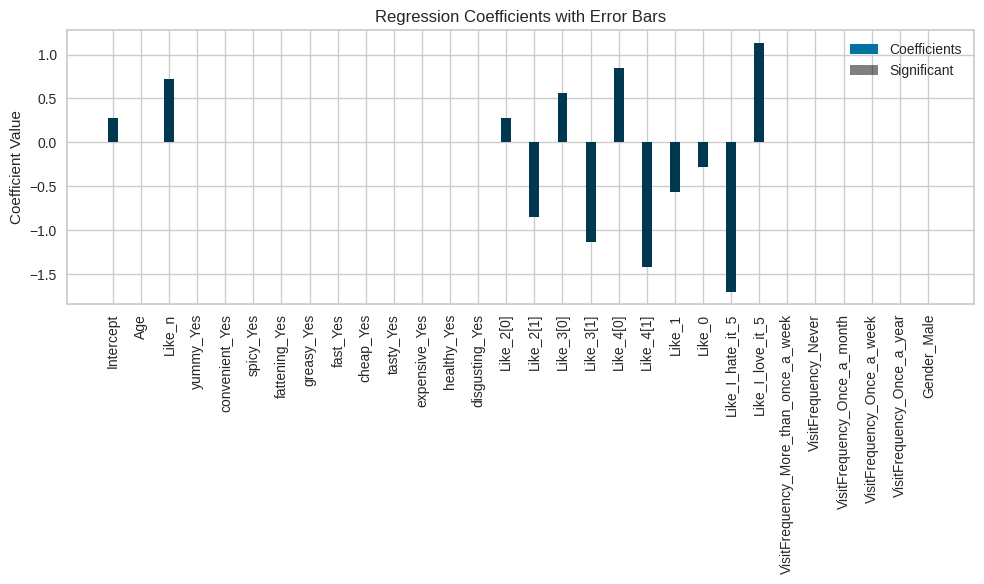

In [116]:
data = {
    'Variable': ['Intercept', 'Age', 'Like_n', 'yummy_Yes', 'convenient_Yes', 'spicy_Yes',
                 'fattening_Yes', 'greasy_Yes', 'fast_Yes', 'cheap_Yes', 'tasty_Yes',
                 'expensive_Yes', 'healthy_Yes', 'disgusting_Yes', 'Like_2[0]', 'Like_2[1]',
                 'Like_3[0]', 'Like_3[1]', 'Like_4[0]', 'Like_4[1]', 'Like_1', 'Like_0',
                 'Like_I_hate_it_5', 'Like_I_love_it_5', 'VisitFrequency_More_than_once_a_week',
                 'VisitFrequency_Never', 'VisitFrequency_Once_a_month', 'VisitFrequency_Once_a_week',
                 'VisitFrequency_Once_a_year', 'Gender_Male'],
    'Coefficients': [0.283, -0.000, 0.717, 0.000, 0.000, -0.000, -0.000, -0.000, 0.000, 0.000, 0.000,
                     0.000, -0.000, -0.000, 0.283, -0.850, 0.567, -1.134, 0.850, -1.417, -0.567,
                     -0.283, -1.700, 1.134, 0.000, -0.000, 0.000, 0.000, -0.000, 0.000],
    'Std.Err.': [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
                 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
                 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
}

coefficients = pd.DataFrame(data)

# Calculate the significance of coefficients using 95% confidence intervals
coefficients['Significant'] = (coefficients['Coefficients'] - 1.96 * coefficients['Std.Err.'] >
                              0) | (coefficients['Coefficients'] + 1.96 * coefficients['Std.Err.'] < 0)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = np.arange(len(coefficients))

# Plot the bars for each coefficient
ax.bar(x, coefficients['Coefficients'], width, label='Coefficients')

# Add error bars representing 95% confidence intervals
ax.errorbar(x, coefficients['Coefficients'], yerr=1.96 * coefficients['Std.Err.'], fmt='none', capsize=5)

# Add shading for significant coefficients
ax.bar(x[coefficients['Significant']], coefficients.loc[coefficients['Significant'], 'Coefficients'],
       width, color='black', alpha=0.5, label='Significant')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(coefficients['Variable'], rotation=90)
ax.set_ylabel('Coefficient Value')
ax.set_title('Regression Coefficients with Error Bars')
ax.legend()

plt.tight_layout()
plt.show()


### Profiling Segments

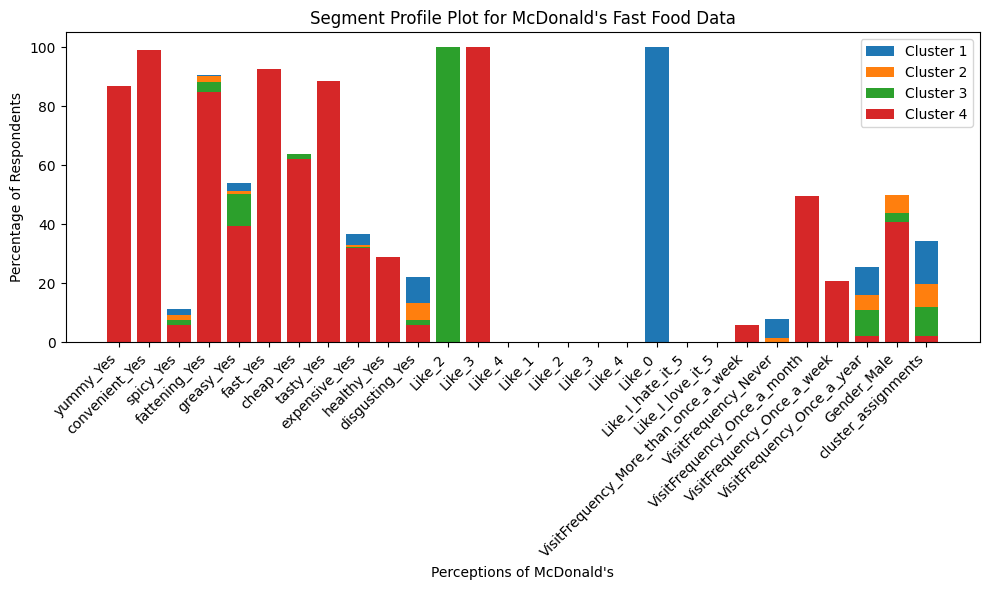

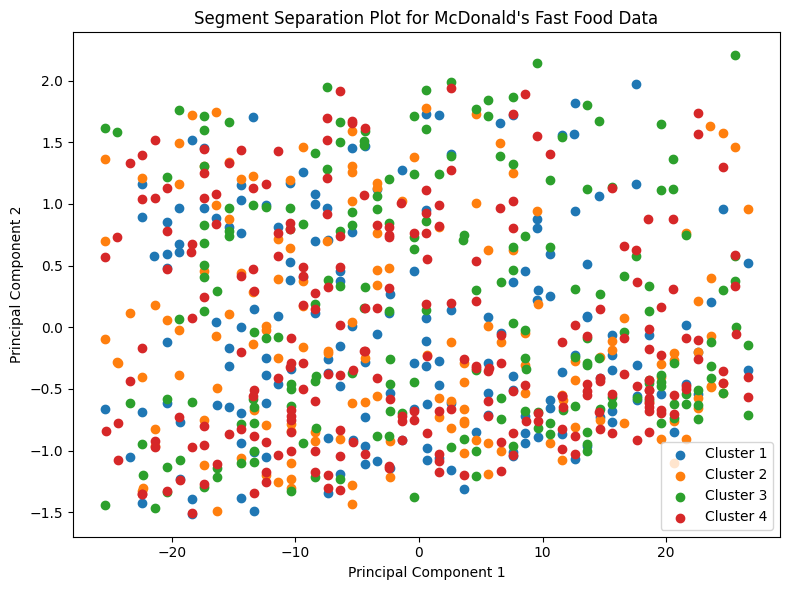

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Step 1: Use PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(mcdonalds_encoded.drop(columns=['Like_n']))

# Step 2: Perform hierarchical clustering on the PCA-transformed data
distance_matrix = linkage(X_pca, method='ward')

# Step 3: Reorder the rows of the DataFrame based on the hierarchical clustering
ordered_rows = mcdonalds_encoded.iloc[dendrogram(distance_matrix, no_plot=True, orientation='right')['leaves']]
mcdonalds_reordered = mcdonalds_encoded.loc[ordered_rows.index]

# Step 4: Plot the segment profile plot
fig, ax = plt.subplots(figsize=(10, 6))
num_segments = 4  # Assuming 4 segments
segment_names = [f"Cluster {i + 1}" for i in range(num_segments)]

for i, segment_name in enumerate(segment_names):
    segment_data = mcdonalds_reordered[mcdonalds_reordered['Like_n'] == i]
    segment_percentage = segment_data.iloc[:, 2:].mean() * 100
    ax.bar(range(len(segment_percentage)), segment_percentage, label=segment_name)

ax.set_xticks(range(len(segment_percentage)))
ax.set_xticklabels(segment_percentage.index, rotation=45, ha='right')
ax.set_xlabel('Perceptions of McDonald\'s')
ax.set_ylabel('Percentage of Respondents')
ax.set_title('Segment Profile Plot for McDonald\'s Fast Food Data')
ax.legend()
plt.tight_layout()
plt.show()

# Step 5: Plot the segment separation plot
plt.figure(figsize=(8, 6))
for i, segment_name in enumerate(segment_names):
    segment_data = X_pca[mcdonalds_reordered['Like_n'] == i]
    plt.scatter(segment_data[:, 0], segment_data[:, 1], label=segment_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot for McDonald\'s Fast Food Data')
plt.legend()
plt.tight_layout()
plt.show()


### Describing Segments

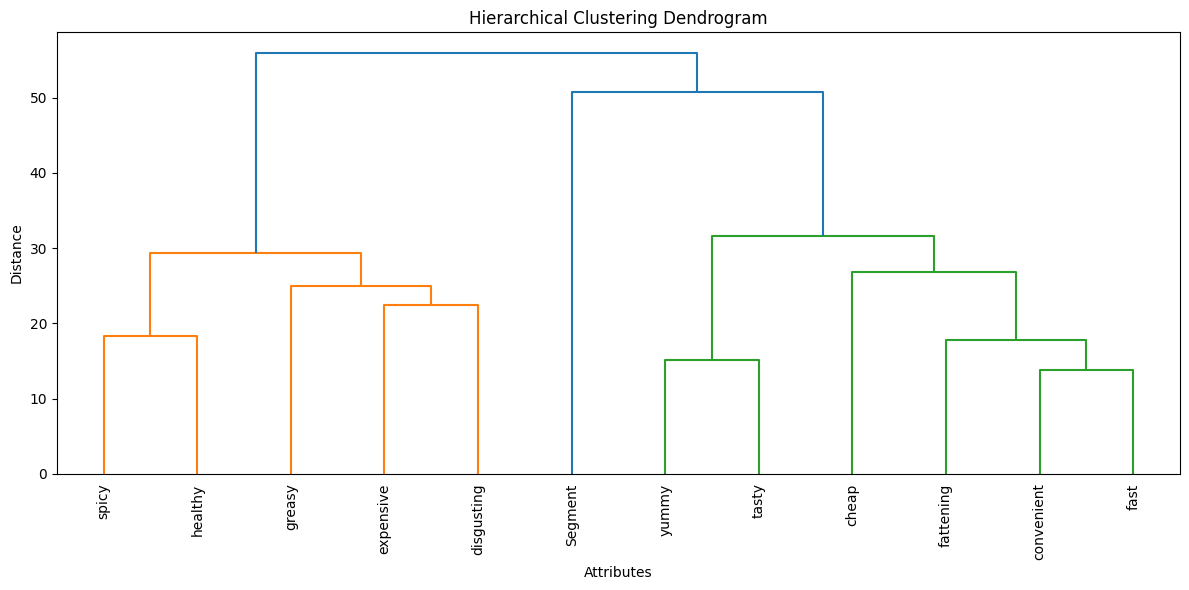

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering on the attributes
Z = linkage(MD_x.T, method='ward')

# Plot the dendrogram to visualize the clustering of attributes
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Attributes')
plt.ylabel('Distance')
dendrogram(Z, labels=MD_x.columns, leaf_rotation=90, leaf_font_size=10)
plt.tight_layout()
plt.show()

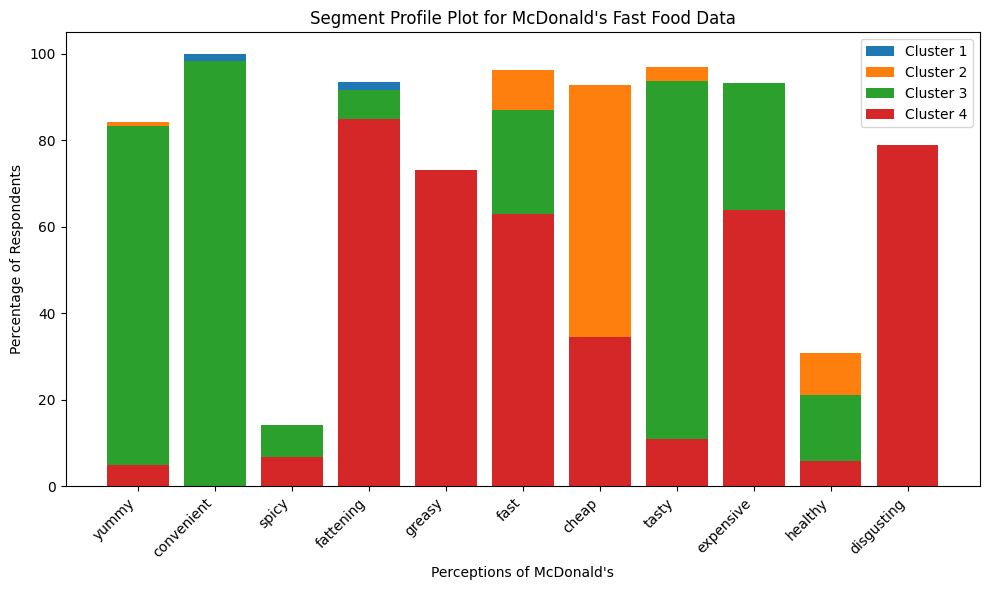

In [26]:
# Assuming you have the DataFrame 'MD_x' with the segments labeled as 'Segment'
fig, ax = plt.subplots(figsize=(10, 6))
num_segments = 4  # Assuming 4 segments
segment_names = [f"Cluster {i + 1}" for i in range(num_segments)]

for i, segment_name in enumerate(segment_names):
    segment_data = MD_x[MD_x['Segment'] == i]
    segment_percentage = segment_data.iloc[:, :-1].mean() * 100
    ax.bar(range(len(segment_percentage)), segment_percentage, label=segment_name)

ax.set_xticks(range(len(segment_percentage)))
ax.set_xticklabels(MD_x.columns[:-1], rotation=45, ha='right')
ax.set_xlabel('Perceptions of McDonald\'s')
ax.set_ylabel('Percentage of Respondents')
ax.set_title('Segment Profile Plot for McDonald\'s Fast Food Data')
ax.legend()
plt.tight_layout()
plt.show()


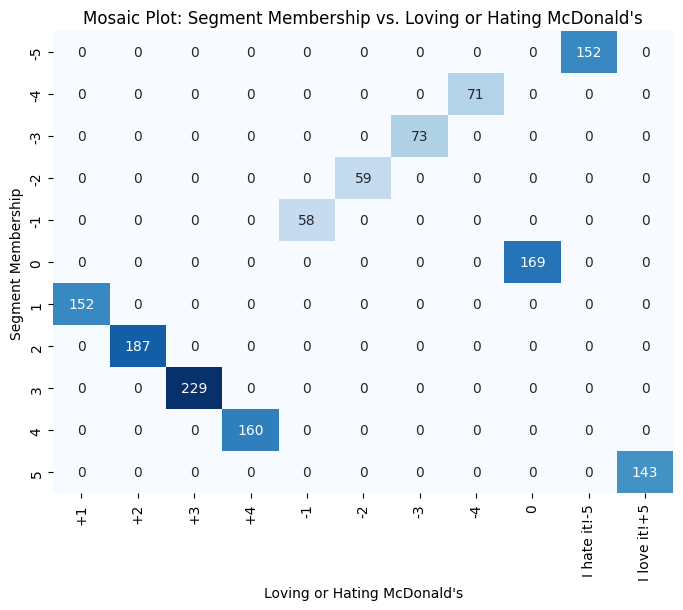

In [27]:
# Cross-tabulate segment membership and 'Like' values
cross_tab = pd.crosstab(mcdonalds['Like_n'], mcdonalds['Like'])

# Create the mosaic plot with shade=True
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel("Loving or Hating McDonald's")
plt.ylabel("Segment Membership")
plt.title("Mosaic Plot: Segment Membership vs. Loving or Hating McDonald's")
plt.show()

<Figure size 800x600 with 0 Axes>

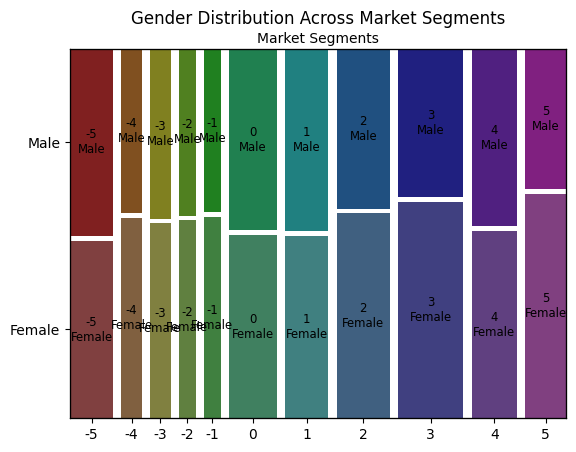

In [28]:
from statsmodels.graphics.mosaicplot import mosaic

# Cross-tabulate segment membership and gender
segment_gender_cross_tab = pd.crosstab(mcdonalds['Like_n'], mcdonalds['Gender'])

# Plot the mosaic plot
plt.figure(figsize=(8, 6))
mosaic(segment_gender_cross_tab.stack(), title='Gender Distribution Across Market Segments', gap=0.02)

# Customize the plot
plt.xlabel('Market Segments')
plt.ylabel('Gender')
plt.show()

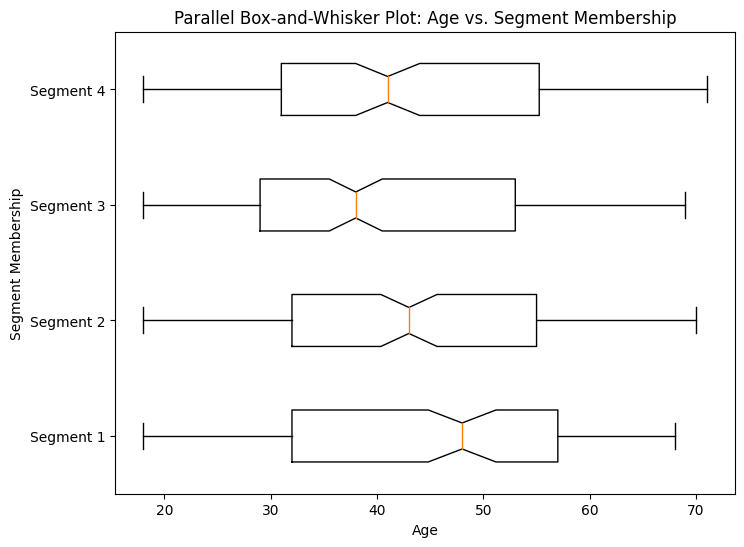

In [29]:
# Plot the parallel box-and-whisker plot
plt.figure(figsize=(8, 6))
plt.boxplot([mcdonalds[mcdonalds['Like_n'] == i]['Age'] for i in range(1, 5)],
            labels=['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4'],
            notch=True, vert=False)

plt.xlabel("Age")
plt.ylabel("Segment Membership")
plt.title("Parallel Box-and-Whisker Plot: Age vs. Segment Membership")
plt.show()


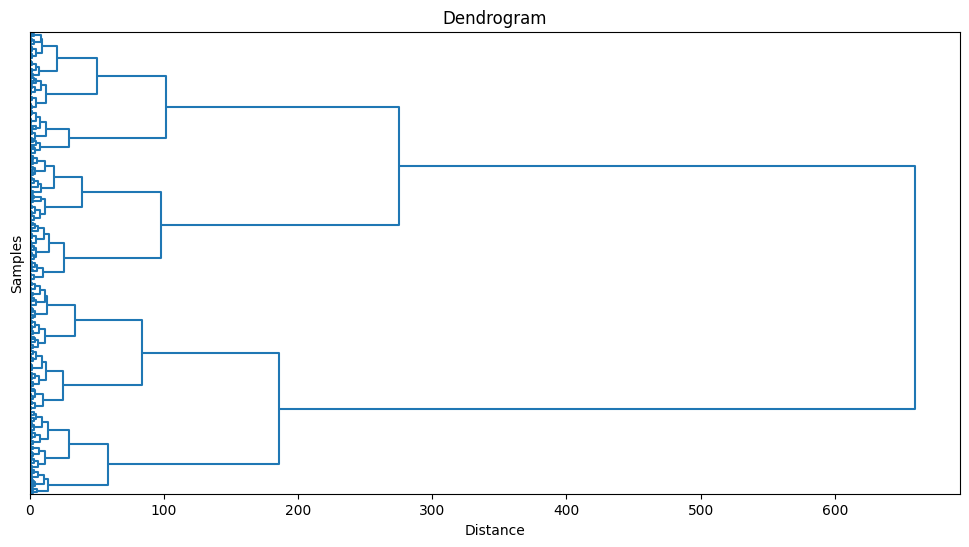

In [30]:
# Visualize the dendrogram to inspect the clustering structure
plt.figure(figsize=(12, 6))
dendrogram(distance_matrix, no_labels=True, orientation='right', leaf_font_size=10, color_threshold=0)
plt.title('Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Samples')
plt.show()


In [54]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the "VisitFrequency" column using label encoding
mcdonalds["VisitFrequency"] = label_encoder.fit_transform(mcdonalds["VisitFrequency"])
mcdonalds["Gender"] = label_encoder.fit_transform(mcdonalds["Gender"])

# Display the updated DataFrame
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n,k4
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,0,0,-3,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,0,0,2,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,0,0,1,2
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,4,0,4,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,3,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,5,1,-5,0
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,4,0,2,1
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,3,0,3,2
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,0,1,4,1


[[528   3]
 [ 12  39]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.99       531
        True       0.93      0.76      0.84        51

    accuracy                           0.97       582
   macro avg       0.95      0.88      0.91       582
weighted avg       0.97      0.97      0.97       582



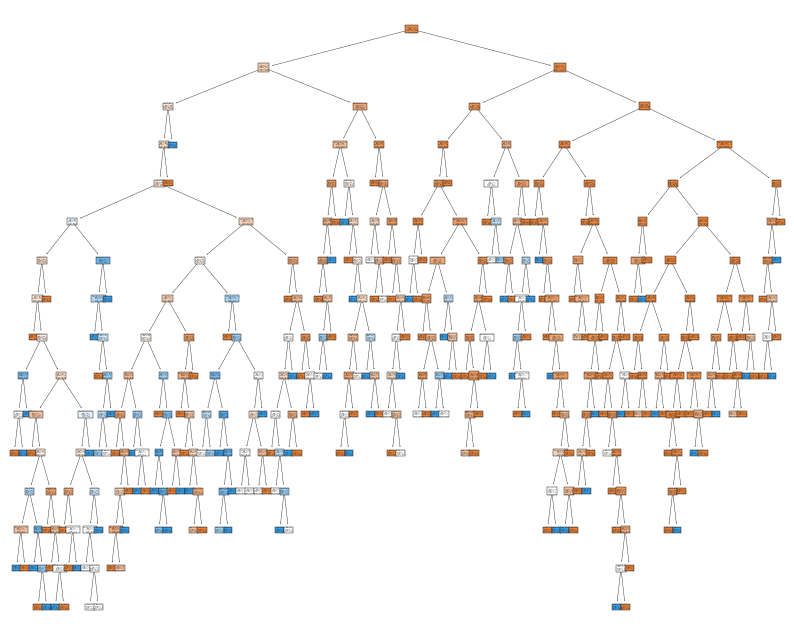

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn import tree

# Define the features and target variable
X = mcdonalds[["Like_n", "Age", "VisitFrequency", "Gender"]]
y = mcdonalds["k4"] ==3

# Split the data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the decision tree model
clsf = tree.DecisionTreeClassifier(random_state=1234)

# Fit the model on the data
Decision_model = clsf.fit(X, y)
y_pred = Decision_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(Decision_model, feature_names=["Like_n", "Age", "VisitFrequency", "Gender"], class_names=["False", "True"], filled=True)
plt.show()

<Figure size 800x600 with 0 Axes>

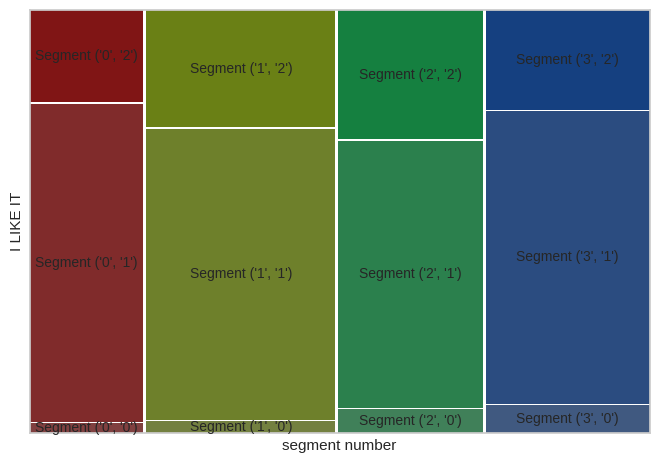

In [89]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Step 1: Perform hierarchical clustering to obtain segment membership
clusters = fcluster(distance_matrix, t=4, criterion='maxclust')

# Step 2: Cross-tabulate segment membership and the 'Like.n' variable
table_like_n = pd.crosstab(pd.Series(clusters, name='Segment'), mcdonalds['Like_n'])

# Step 3: Create the mosaic plot
segment_like_hate = [(segment, table_like_n.loc[segment, 1], table_like_n.loc[segment, -1]) for segment in table_like_n.index]

plt.figure(figsize=(8, 6))
mosaic(segment_like_hate, title='', labelizer=lambda k: f"Segment {k}", axes_label=False)
plt.xlabel('segment number')
plt.ylabel('I LIKE IT')
plt.show()


In [101]:
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()
print(visit)

k4
0    2.680905
1    2.621931
2    2.550769
3    2.815126
Name: VisitFrequency, dtype: float64


In [102]:
like = mcdonalds.groupby('k4')['Like_n'].mean()

print(like)

k4
0   -1.590452
1    2.513912
2    1.975385
3   -3.495798
Name: Like_n, dtype: float64


In [107]:
female = mcdonalds.groupby('k4')['Gender'].mean()
female

k4
0    0.464824
1    0.399345
2    0.526154
3    0.546218
Name: Gender, dtype: float64

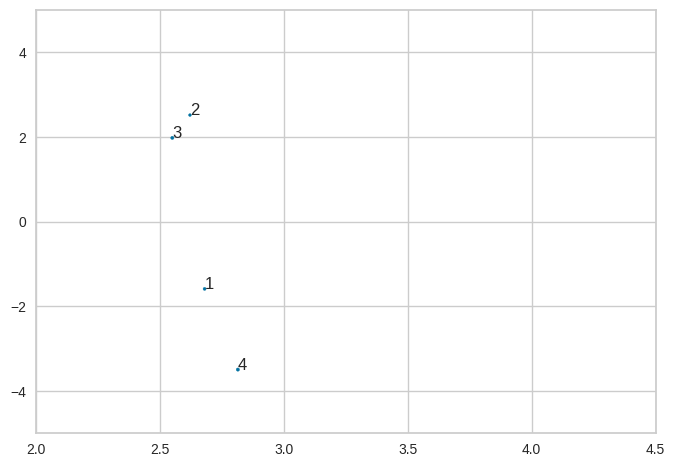

In [113]:
data = {
    "visit": visit,
    "like": like,
    "female": female
}

df = pd.DataFrame(data)

plt.scatter(df["visit"], df["like"], s=10 * df["female"])
plt.xlim(2, 4.5)
plt.ylim(-5, 5)

for i, row in df.iterrows():
    plt.text(row["visit"], row["like"], str(i+1))

plt.show()
